# Contents

1. Import Libraries and data set

2. Remove categorical columns

3. Use the elbow technique

4. Run the k-meaks algorithm

5. Add a clusters column

6. Create visualizations

7. Calculate descriptive statistics for the clusters

# Import Libraries and data set 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# Create a path 
path = r'/Users/ATeam/Desktop/CF/Achievement 6 - Applied analytics/Air Pollution'

In [3]:
#Import data set 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'air_pollution_2.csv'))

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Code,Year,Air pollution total deaths,Indoor air pollution deaths,Outdoor particule matter deaths,Outdoor ozone pollution deaths
0,0,0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,1,1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,2,2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,3,3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,4,4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


# Remove categorical columns

In [17]:
# Drop Country and Code columns 
df.drop(columns=['Country', 'Code'], inplace=True
 
# Check column drop was processed correctly         
df.head()        

,Unnamed: 0.1,Unnamed: 0,Year,Air pollution total deaths,Indoor air pollution deaths,Outdoor particule matter deaths,Outdoor ozone pollution deaths
0,0,0,1990,299.477309,250.362910,46.446589,5.616442
1,1,1,1991,291.277967,242.575125,46.033841,5.603960
2,2,2,1992,278.963056,232.043878,44.243766,5.611822
3,3,3,1993,278.790815,231.648134,44.440148,5.655266
4,4,4,1994,287.162923,238.837177,45.594328,5.718922


# Use the elbow technique

In [18]:
# Define the range
num_cl = range(1, 10)

# Define kmeans cluster
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [19]:
# Create a score
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

/Users/ATeam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ATeam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ATeam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ATeam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [20]:
# Check the score
score

[-45144781294.40329,
 -11321080557.604038,
 -5057573168.284527,
 -2865651566.7686796,
 -1850531860.4725387,
 -1299146809.911603,
 -967432440.5706075,
 -750525774.8133624,
 -602733799.101694]

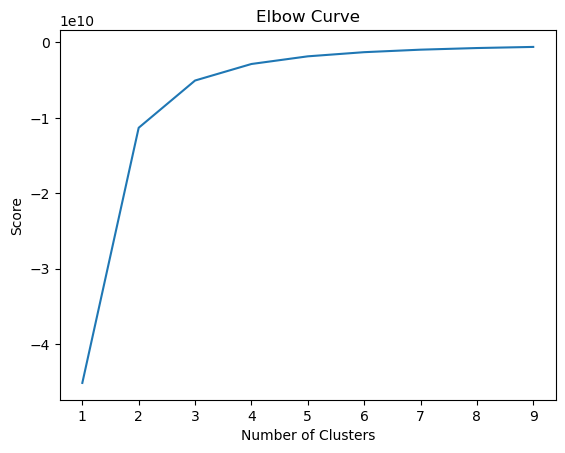

In [21]:
# Plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I am going to set the number of clusters to 3, as after this mark the curve begins to flatten out. 

# Run the k-means algorithm 

In [22]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3) 

In [23]:
# Fit the k-means object
kmeans.fit(df)

/Users/ATeam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

# Add a clusters column

In [24]:
# Create a clusters column
df['clusters'] = kmeans.fit_predict(df)

/Users/ATeam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
# Check the clusters column was added correctly 
df.head()

,Unnamed: 0.1,Unnamed: 0,Year,Air pollution total deaths,Indoor air pollution deaths,Outdoor particule matter deaths,Outdoor ozone pollution deaths,clusters
0,0,0,1990,299.477309,250.362910,46.446589,5.616442,0
1,1,1,1991,291.277967,242.575125,46.033841,5.603960,0
2,2,2,1992,278.963056,232.043878,44.243766,5.611822,0
3,3,3,1993,278.790815,231.648134,44.440148,5.655266,0
4,4,4,1994,287.162923,238.837177,45.594328,5.718922,0


# Create visualizations

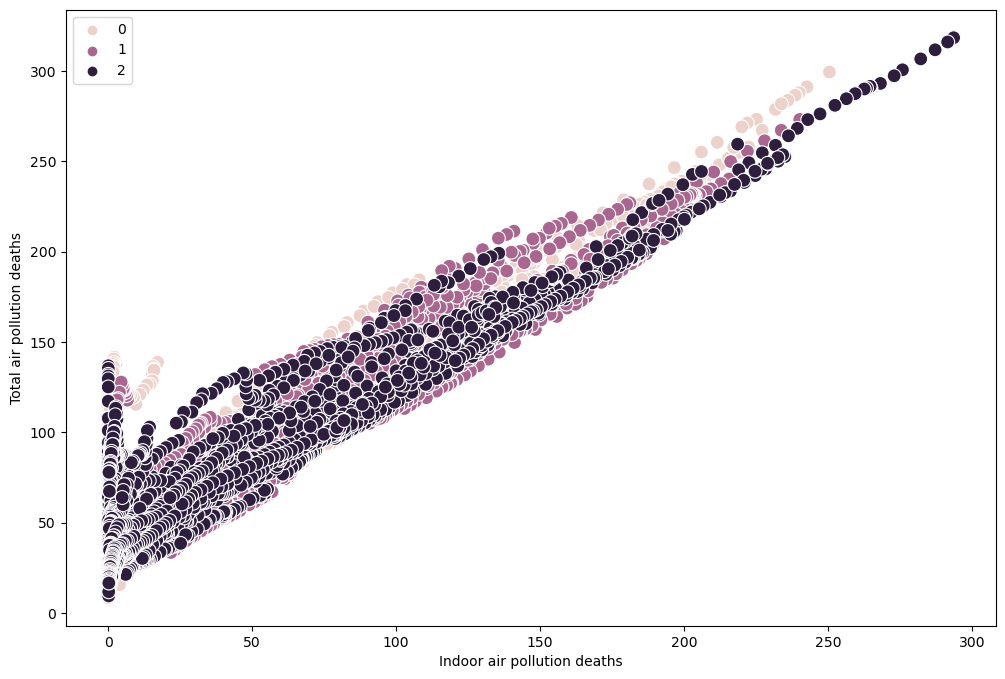

In [26]:
# Plot the clusters for 'Air pollution total deaths' and 'Indoor air pollution deaths' 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Indoor air pollution deaths'], y=df['Air pollution total deaths'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Indoor air pollution deaths') 
plt.ylabel('Total air pollution deaths') 
plt.show()

These cluster have a lot of overlap until the after 100 where we start to see cluster 2 sit on the bottom, 1 throughout and cluster 0 in the middle. At the 200 mark cluster 0 is predominatly at all of the high marks. Finally cluster 2 is the only one of the clusters with any points past 250. 

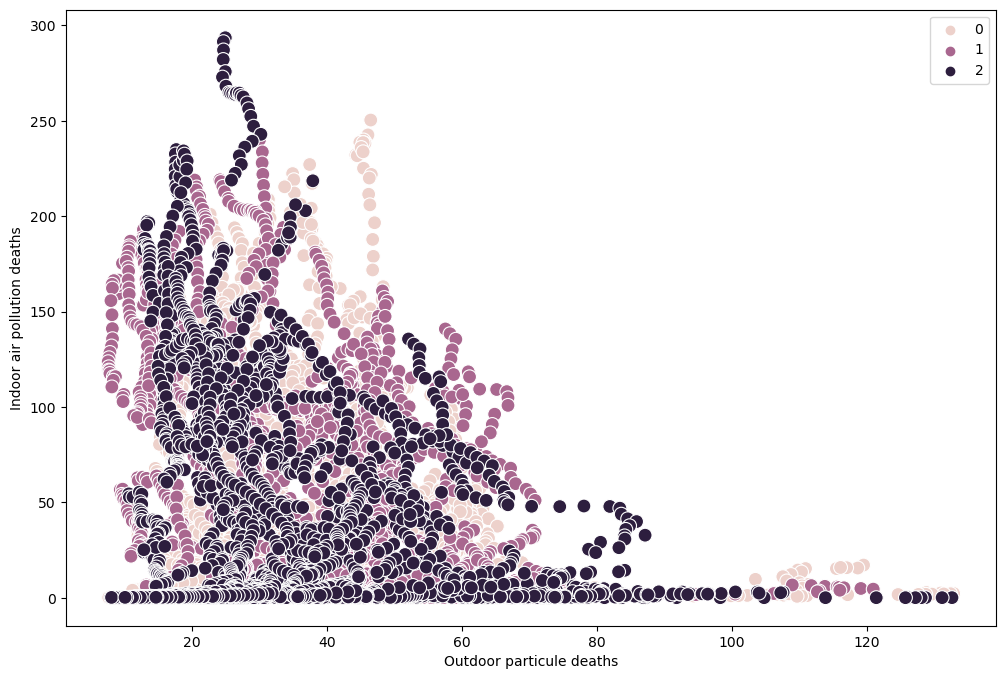

In [28]:
# Plot the clusters for 'Indoor air pollution deaths' and 'Outdoor particule matter deaths'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Outdoor particule matter deaths'], y=df['Indoor air pollution deaths'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Outdoor particule deaths') 
plt.ylabel('Indoor air pollution deaths') 
plt.show()

Before 60 there is a lot of overlap in the clusters, which tells me there is not much differentiation in the clusters up to that point. Past 80 there are more cluster 2 points, but clusters 1 and 2 points appear more frequently between 100-120.

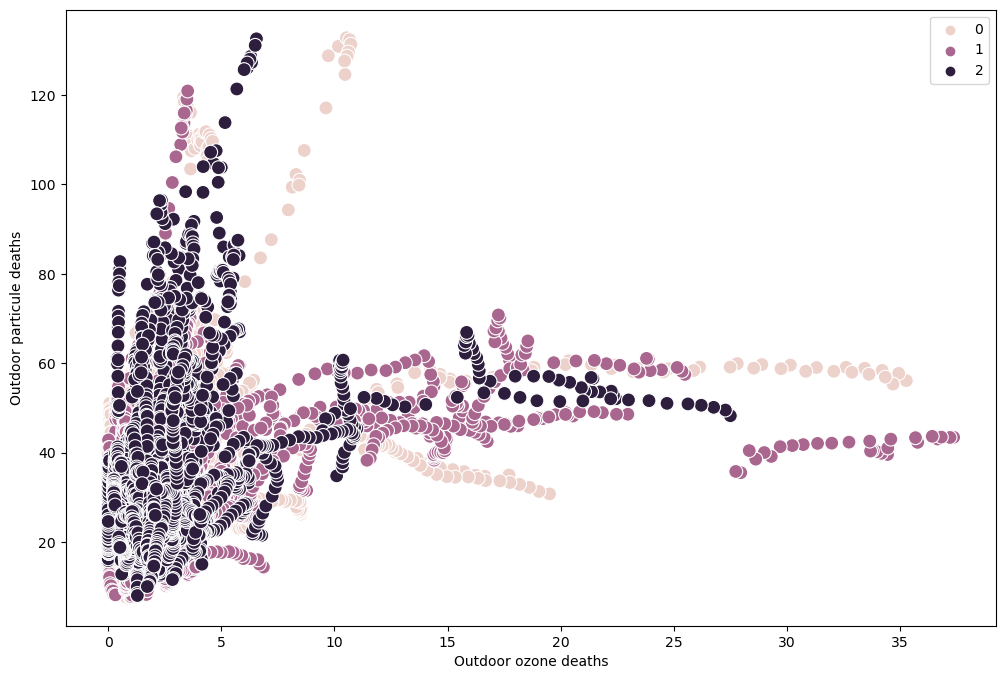

In [29]:
# Plot the clusters for 'Outdoor particule matter deaths' and 'Outdoor zone pollution deaths'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Outdoor ozone pollution deaths'], y=df['Outdoor particule matter deaths'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Outdoor ozone deaths') 
plt.ylabel('Outdoor particule deaths') 
plt.show()

There is a lot of cluster overlap below 5, again showing little variation in the clusters up to this point. There are only cluster 0 and clster 1 points past 27. 

In [31]:
#Check value counts for the clusters 
df['clusters'].value_counts()

clusters
0    2165
1    2156
2    2147
Name: count, dtype: int64

# Calculate the descriptive statistics for the clusters

In [32]:
df.groupby('clusters').agg({'Air pollution total deaths':['mean', 'median'], 
                         'Indoor air pollution deaths':['mean', 'median'], 
                         'Outdoor particule matter deaths':['mean', 'median'],
                          'Outdoor ozone pollution deaths':['mean', 'median']})

Air pollution total deaths            Indoor air pollution deaths  \
                               mean     median                        mean   
clusters                                                                     
0                         86.368089  69.505291                   49.406352   
1                         88.830265  71.744264                   51.946589   
2                         88.221632  76.657525                   50.094444   

                    Outdoor particule matter deaths             \
             median                            mean     median   
clusters                                                         
0         23.096805                       34.883661  30.774106   
1         24.061707                       34.268695  31.852620   
2         24.453396                       36.198078  30.595932   

         Outdoor ozone pollution deaths            
                                   mean    median  
clusters                                           
0                              3.196704  2.181423  
1                              4.035235  2.490427  
2                              2.879112  2.217158

As suspected, there is not a great deal of variance amongst the clusters. The clusters are essentially divided by a low, mid and high number of deaths. This does not feel useful to future analysis, but does help clear up that the different types of pollution deaths do not correlate to one another other than having an impact on the total air pollution death numbers. 